* idade - idade em anos
* sexo - (1 = masculino; 0 = feminino)
* cp - tipo de dor no peito
* trestbps - pressão arterial em repouso (em mm Hg na admissão ao hospital)
* chol - soro colestoral em mg/dl
* fbs - (glicemia em jejum > 120 mg/dl) (1 =  verdadeiro; 0 = falso)
* restecg - resultados eletrocardiográficos em repouso
* tálaco - frequência cardíaca máxima atingida
* exang - angina induzida pelo exercício (1 = sim; 0 = não)
* pico antigo - depressão do segmento ST induzida pelo exercício em relação ao * repouso
* inclinação - a inclinação do segmento ST de exercício de pico
* ca - número de vasos principais (0-3) coloridos por fluorosopia
* tal - 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
* alvo - tem doença ou não (1=sim, 0=não)

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
df = pd.read_csv('/content/drive/MyDrive/colab/heart_attack.csv', header=None)

In [68]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [69]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
'oldpeak', 'slope', 'ca', 'thal', 'target']

In [70]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [74]:
df['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

In [72]:
# Maneira 1
df['target'].replace(2, 1, inplace=True)
df['target'].replace(3, 1, inplace=True)
df['target'].replace(4, 1, inplace=True)

In [73]:
# Maneira 2
df['target'] = df['target'].apply(lambda x: 1 if x != 0 else 0)

In [39]:
# Maneira 3
attack = {
    0:0,
    1:1,
    2:1,
    3:1,
    4:1
}
df['target'] = df['target'].map(attack)

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [44]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [75]:
df = df.dropna()

In [76]:
df.shape

(297, 14)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [78]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


In [47]:
df['sex'].value_counts()

1    201
0     96
Name: sex, dtype: int64

In [48]:
df['cp'].value_counts()

4    142
3     83
2     49
1     23
Name: cp, dtype: int64

In [49]:
df['fbs'].value_counts()

0    254
1     43
Name: fbs, dtype: int64

In [50]:
df['restecg'].value_counts()


0    147
2    146
1      4
Name: restecg, dtype: int64

In [51]:
df['exang'].value_counts()

0    200
1     97
Name: exang, dtype: int64

In [52]:
df['slope'].value_counts()

1    139
2    137
3     21
Name: slope, dtype: int64

In [53]:
df['ca'].value_counts() 

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [54]:
df['thal'].value_counts()

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

In [60]:
dsex =  pd.get_dummies(df['sex'], prefix='sex')
dcp =  pd.get_dummies(df['cp'], prefix='cp')
dfbs =  pd.get_dummies(df['fbs'], prefix='fbs')
drestecg =  pd.get_dummies(df['restecg'], prefix='restecg')
dexang =  pd.get_dummies(df['exang'], prefix='exang')
dslope =  pd.get_dummies(df['slope'], prefix='slope')
dca =  pd.get_dummies(df['ca'], prefix='ca')
dthal =  pd.get_dummies(df['thal'], prefix='thal')

In [61]:
new_columns = [df, dsex, dcp, dfbs, drestecg, dexang, dslope, dca, dthal]
df = pd.concat(new_columns, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63,1,1,145,233,1,2,150,0,2.3,...,0,0,1,1,0,0,0,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,...,0,1,0,0,0,0,1,1,0,0
2,67,1,4,120,229,0,2,129,1,2.6,...,0,1,0,0,0,1,0,0,0,1
3,37,1,3,130,250,0,0,187,0,3.5,...,0,0,1,1,0,0,0,1,0,0
4,41,0,2,130,204,0,2,172,0,1.4,...,1,0,0,1,0,0,0,1,0,0


In [62]:
df = df.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67,160,286,108,1.5,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67,120,229,129,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41,130,204,172,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [66]:
df.corr()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.227075,0.092399,-0.092399,0.042571,-0.163227,...,-0.183998,0.171004,0.025612,-0.376277,0.171946,0.222475,0.159356,-0.130333,0.059732,0.103792
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.153490,0.066340,-0.066340,0.149921,-0.080820,...,-0.087677,0.025511,0.121060,-0.047292,-0.061574,0.086767,0.078892,-0.143474,0.075211,0.109624
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.080285,0.198089,-0.198089,-0.057040,-0.017678,...,-0.015037,0.041510,-0.051456,-0.089797,0.007881,0.052369,0.093691,0.001379,-0.099575,0.047368
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.423817,0.060496,-0.060496,0.080420,0.256120,...,0.452458,-0.423817,-0.056541,0.293299,-0.196607,-0.056676,-0.176564,0.286684,-0.160679,-0.213956
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.424052,-0.106567,0.106567,0.083559,-0.283033,...,-0.514262,0.312656,0.393024,-0.224689,-0.018964,0.214636,0.186832,-0.347874,0.101819,0.305253
target,0.227075,0.153490,0.080285,-0.423817,0.424052,1.000000,-0.278467,0.278467,-0.091208,-0.247535,...,-0.380612,0.349635,0.060950,-0.483530,0.228974,0.272400,0.209531,-0.524972,0.104651,0.484657
sex_0,0.092399,0.066340,0.198089,0.060496,-0.106567,-0.278467,1.000000,-1.000000,-0.092497,0.041925,...,0.015447,0.010357,-0.050211,0.113376,-0.104641,0.015456,-0.070798,0.390730,-0.145368,-0.327671
sex_1,-0.092399,-0.066340,-0.198089,-0.060496,0.106567,0.278467,-1.000000,1.000000,0.092497,-0.041925,...,-0.015447,-0.010357,0.050211,-0.113376,0.104641,-0.015456,0.070798,-0.390730,0.145368,0.327671
cp_1,0.042571,0.149921,-0.057040,0.080420,0.083559,-0.091208,-0.092497,0.092497,1.000000,-0.128784,...,-0.044541,0.009870,0.067508,0.064580,-0.061958,0.039870,-0.077851,0.007591,0.031996,-0.023422
cp_2,-0.163227,-0.080820,-0.017678,0.256120,-0.283033,-0.247535,0.041925,-0.041925,-0.128784,1.000000,...,0.237566,-0.211140,-0.051832,0.152726,-0.059762,-0.088788,-0.083242,0.217866,-0.036866,-0.204351


In [79]:
X = df.drop('target', axis=1)
Y = df['target']

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42, stratify=Y)

In [85]:
scaler = StandardScaler()

In [86]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [98]:
train_scores = []
test_scores = []

for i in range(1,15):
  knn = KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train)
  train_scores.append(knn.score(x_train_scaled, y_train))
  test_scores.append(knn.score(x_test_scaled, y_test))


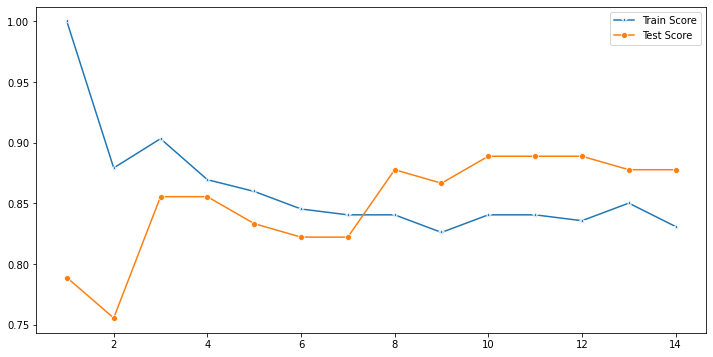

In [101]:
plt.figure(figsize=(12, 6))
sns.lineplot(range(1,15), train_scores, marker='*', label='Train Score')
sns.lineplot(range(1,15), test_scores, marker='o', label='Test Score')
plt.show()

In [102]:
knn = KNeighborsClassifier(11)
knn.fit(x_train_scaled, y_train)
yHat = knn.predict(x_test_scaled)

In [117]:
yHat_prob = knn.predict_proba(x_test_scaled)[:, 1]

In [118]:
yHat_prob

array([0.36363636, 1.        , 0.09090909, 0.        , 0.09090909,
       1.        , 0.09090909, 0.18181818, 0.        , 0.54545455,
       1.        , 1.        , 1.        , 0.18181818, 0.81818182,
       0.63636364, 0.        , 0.81818182, 0.27272727, 0.27272727,
       0.63636364, 0.90909091, 0.36363636, 0.09090909, 0.45454545,
       0.18181818, 0.18181818, 1.        , 0.18181818, 0.90909091,
       0.45454545, 0.27272727, 0.        , 0.36363636, 0.        ,
       0.09090909, 0.72727273, 0.81818182, 1.        , 0.09090909,
       0.72727273, 0.54545455, 0.72727273, 0.18181818, 0.        ,
       0.        , 0.09090909, 0.90909091, 0.18181818, 1.        ,
       0.63636364, 0.72727273, 0.63636364, 0.63636364, 1.        ,
       0.18181818, 0.90909091, 0.36363636, 0.09090909, 0.81818182,
       0.09090909, 0.90909091, 0.09090909, 0.90909091, 0.27272727,
       1.        , 0.27272727, 0.36363636, 1.        , 0.27272727,
       0.09090909, 0.90909091, 0.81818182, 0.72727273, 0.27272

In [103]:
cmf = metrics.confusion_matrix(y_test, yHat)

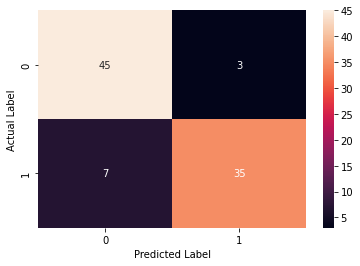

In [104]:
sns.heatmap(pd.DataFrame(cmf), annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [107]:
from sklearn.preprocessing import binarize

In [133]:
yHat_class = binarize([yHat_prob], threshold=0.5)[0]

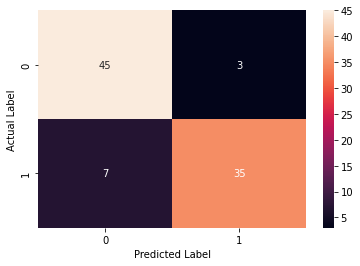

In [134]:
cmf = metrics.confusion_matrix(y_test, yHat_class)
sns.heatmap(pd.DataFrame(cmf), annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [135]:
from sklearn.model_selection import GridSearchCV

In [141]:
knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1,50, 2)}

In [142]:
knn_cv = GridSearchCV(knn, params, cv=10)

In [143]:
knn_cv.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])})

In [144]:
knn_cv.best_score_

0.8352380952380951

In [145]:
knn_cv.best_params_

{'n_neighbors': 37}

In [146]:
knn = KNeighborsClassifier(37)
knn.fit(x_train_scaled, y_train)
yHat = knn.predict(x_test_scaled)


In [147]:
cmf = metrics.confusion_matrix(y_test, yHat)

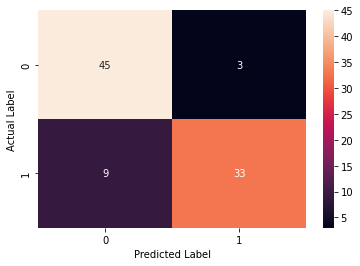

In [148]:
sns.heatmap(pd.DataFrame(cmf), annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()